Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [1]:
import random
import lab9_lib
import matplotlib.pyplot as plt


In [2]:
fitness = lab9_lib.make_problem(10)
for n in range(10):
    ind = choices([0, 1], k=50)
    print(f"{''.join(str(g) for g in ind)}: {fitness(ind):.2%}")

print(fitness.calls)

NameError: name 'choices' is not defined

Instance Size: 1, Number of fitness calls: 6813
Instance Size: 2, Number of fitness calls: 6729
Instance Size: 5, Number of fitness calls: 7047
Instance Size: 10, Number of fitness calls: 9164


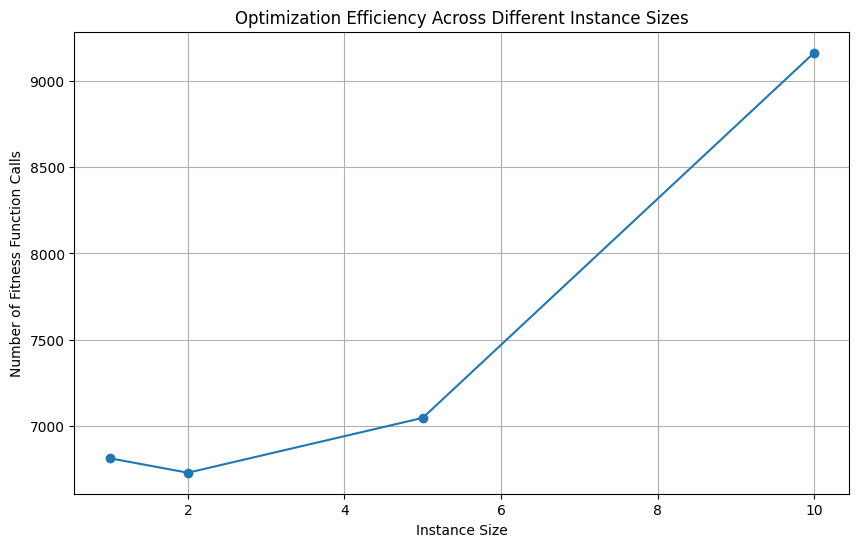

In [13]:
class GenomeOptimizer:
    def __init__(self, instance_size, total_length, mutation_rate=0.15):
        self.instance_size = instance_size
        self.total_length = total_length
        self.mutation_rate = mutation_rate
        self.fitness_function = lab9_lib.make_problem(instance_size)

    def mutate_segment(self, segment):
        original_fitness = self.fitness_function(segment)
        if original_fitness == 1.0:
            return segment, original_fitness

        mutated_segment = segment.copy()
        for i in range(len(segment)):
            if random.random() < self.mutation_rate:
                mutated_segment[i] = 1 - mutated_segment[i]
        mutated_fitness = self.fitness_function(mutated_segment)

        return (mutated_segment, mutated_fitness) if mutated_fitness > original_fitness else (segment, original_fitness)

    def split_genome(self, genome):
        """
        Splits the genome into smaller segments based on instance size.
        """
        segment_count = self.total_length // self.instance_size
        return [genome[i * self.instance_size: (i + 1) * self.instance_size] for i in range(segment_count)]

    def optimize_segment(self, segment):
        """
        Optimizes a single genome segment.
        """
        fitness = 0
        while fitness < 1.0:
            segment, fitness = self.mutate_segment(segment)
        return segment, fitness

    def optimize(self):
        """
        Optimizes the entire genome.
        """
        genome = random.choices([0, 1], k=self.total_length)
        segments = self.split_genome(genome)
        optimized_genome = [self.optimize_segment(segment) for segment in segments]
        total_fitness = sum(fitness for _, fitness in optimized_genome) / len(optimized_genome)
        return self.fitness_function.calls, total_fitness

def plot_results(instance_sizes, call_counts):
    """
    Plots optimization results.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(instance_sizes, call_counts, marker='o')
    plt.xlabel('Instance Size')
    plt.ylabel('Number of Fitness Function Calls')
    plt.title('Optimization Efficiency Across Different Instance Sizes')
    plt.grid(True)
    plt.show()

# Main Execution
GENOME_LENGTH = 1000
MUTATION_RATE = 0.15
instance_sizes = [1, 2, 5, 10]
call_counts = []
fitness_percentages = []

for size in instance_sizes:
    optimizer = GenomeOptimizer(size, GENOME_LENGTH, MUTATION_RATE)
    calls, fitness_percentage = optimizer.optimize()
    call_counts.append(calls)
    fitness_percentages.append(fitness_percentage)
    print(f"Instance Size: {size}, Number of fitness calls: {calls}")

plot_results(instance_sizes, call_counts)